In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/JoinSeol

import time
import numpy

training_data = []
seed = 7
numpy.random.seed(seed)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


time_periods = 20 #frame
number_sensors = 84 #keypoint
input_shape = (time_periods * number_sensors)

# Load CSV dataset with X (training data) and Y (label)
raw_dataset = numpy.loadtxt("HAND_ALL_OneRow.csv", delimiter = ",") 
X = raw_dataset[:, 0:1680] # 양손 keypoint값
y = raw_dataset[:, 1680] # class label
transformer = Normalizer().fit(X)

X = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train)

/content/drive/MyDrive/suna/JoinSeol
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


하나의 라벨은 42개의 keypoint * 20개의 frame

time step : 20
features : 42

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0]

1280
320


In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, Flatten, Activation, Reshape
from keras.callbacks import EarlyStopping
from keras import optimizers
import tensorflow as tf

model = Sequential() # Sequeatial Model
model.add(Reshape((time_periods, number_sensors), input_shape=(input_shape,)))
model.add(Bidirectional(LSTM(120, return_sequences=True)))
model.add(Bidirectional(LSTM(80, return_sequences=True))) # (timestep, feature)
model.add(Bidirectional(LSTM(40, return_sequences=True)))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(20, activation = "softmax")) # output = 20
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 20, 84)            0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 20, 240)          196800    
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 20, 160)          205440    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 20, 80)           64320     
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                      

In [ ]:
# 시간정보를 활용하여 폴더 생성
import datetime

# 학습데이터의 log를 저장할 폴더 생성 (지정)
log_dir = "/content/drive/MyDrive/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# 텐서보드 콜백 정의 하기
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=16, callbacks=[tensorboard_callback])

Epoch 1/100
80/80 [==============================] - 2s 18ms/step - loss: 5.4715e-05 - accuracy: 1.0000
Epoch 2/100
80/80 [==============================] - 1s 18ms/step - loss: 4.7629e-05 - accuracy: 1.0000
Epoch 3/100
80/80 [==============================] - 1s 18ms/step - loss: 4.1682e-05 - accuracy: 1.0000
Epoch 4/100
80/80 [==============================] - 1s 18ms/step - loss: 3.7535e-05 - accuracy: 1.0000
Epoch 5/100
80/80 [==============================] - 1s 18ms/step - loss: 3.3205e-05 - accuracy: 1.0000
Epoch 6/100
80/80 [==============================] - 1s 18ms/step - loss: 3.0267e-05 - accuracy: 1.0000
Epoch 7/100
80/80 [==============================] - 1s 18ms/step - loss: 2.7167e-05 - accuracy: 1.0000
Epoch 8/100
80/80 [==============================] - 1s 19ms/step - loss: 2.4704e-05 - accuracy: 1.0000
Epoch 9/100
80/80 [==============================] - 1s 18ms/step - loss: 2.2988e-05 - accuracy: 1.0000
Epoch 10/100
80/80 [==============================] - 1s 18ms/st

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=16, verbose = 0)
print("Score: ", loss_and_metrics)

10/10 [==============================] - 0s 7ms/step - loss: 1.2137 - accuracy: 0.8750
Score:  [1.2137022018432617, 0.875]


In [ ]:
from matplotlib import pyplot

train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)
#print(train_acc)
print(train_acc, test_acc)
#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

[1.8198008433500945e-07, 1.0] [1.2137019634246826, 0.875]


텐서보드를 colab에서 바로 로드 하기

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir {log_dir}

predict_classes -> predicted

In [ ]:
import numpy as np
y_pred = model.predict(X_test)
predicted = y_pred.argmax(axis=-1)
y_labels = y_test.argmax(axis=-1)

10/10 [==============================] - 0s 7ms/step


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_labels, predicted)
print(cm)

[[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  3  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  1  1  2  0  0  0  0  0  0  0]
 [ 0  3  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  5  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  2 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0  0  0  0  3 14  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 16  0  0

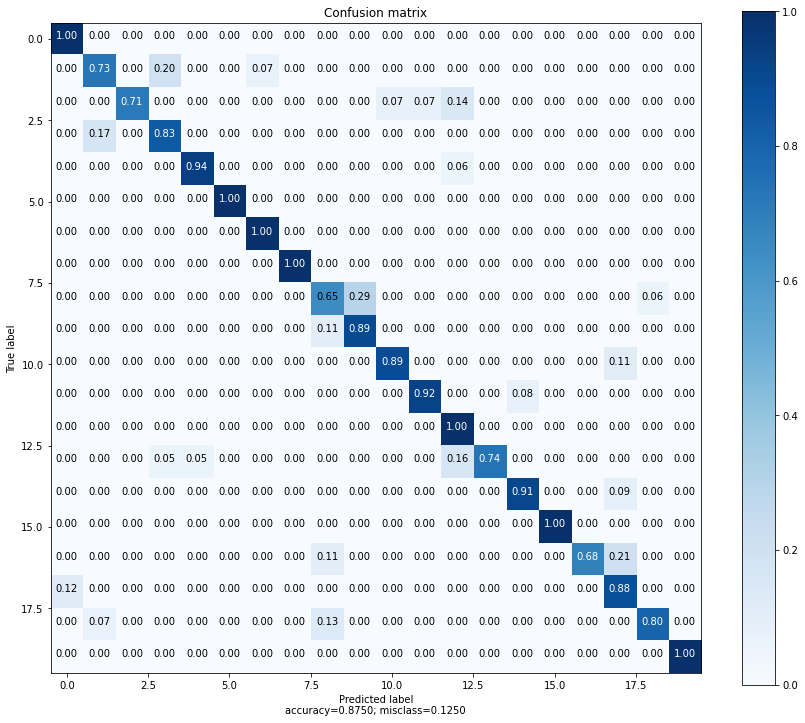

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import itertools
from itertools import product

def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(12, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

p= plot_confusion_matrix(cm)

In [ ]:
%cd /content/drive/MyDrive

model.save("model.h5")